In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
dataset = pd.read_csv('house.csv', sep=';')

PARTE 1 - analisi

In [3]:
#PUNTO 1
dataset.shape

(27063, 16)

In [4]:
dataset.dtypes

Id                   int64
SalePrice            int64
PropertyID           int64
AdjSalePrice       float64
NbrLivingUnits       int64
SqFtLot              int64
SqFtTotLiving        int64
SqFtFinBasement      int64
Bathrooms          float64
Bedrooms             int64
BldgGrade            int64
YrBuilt              int64
TrafficNoise         int64
LandVal              int64
ImpsVal              int64
PropertyType        object
dtype: object

In [5]:
dataset[dataset.isna().any(axis=1)]
# non ci sono valori nan, il dataset è completo

,Id,SalePrice,PropertyID,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,TrafficNoise,LandVal,ImpsVal,PropertyType


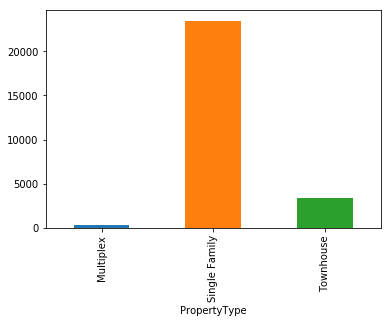

In [6]:
dataset.groupby('PropertyType').size().plot(kind='bar')
plt.show()
# il dataset non è bilanciato per quanto riguarda la classe da predire

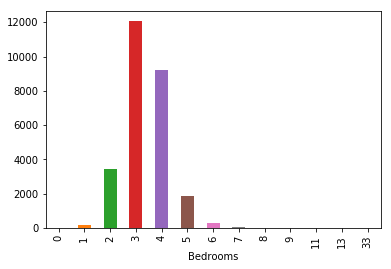

In [7]:
# PUNTO 2
dataset.groupby('Bedrooms').size().plot(kind='bar')
plt.show()
# nella distribuzione si nota una grande presenza di attributi
# 3 e 4 della feature bedrooms, ciò significa che le case con 
# 3 e 4 camere da letto sono le più frequenti
#le diverse classi non sono distribuite equamente

In [8]:
# PUNTO 3
dataset[dataset['Bedrooms'] == 33]
# posso ipotizzare che si tratti di un errore perchè nella proprietà
# vive una singola famiglia, inoltre vi sono 1.75 bagni, il che è un numero
# troppo basso per una casa con 33 persone.
# infine il prezzo è quello di una casa media. 

,Id,SalePrice,PropertyID,AdjSalePrice,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,YrBuilt,TrafficNoise,LandVal,ImpsVal,PropertyType
7277,7278,581000,2402100895,585168.0,1,6000,1620,580,1.75,33,7,1947,0,414000,209000,Single Family


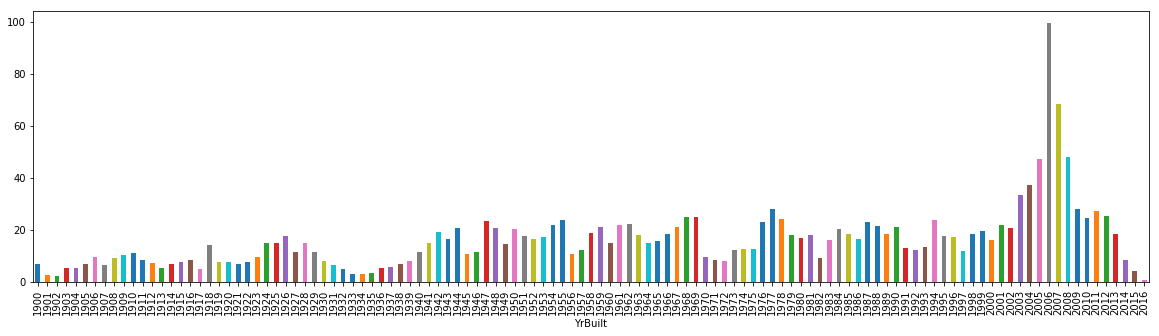

In [9]:
# PUNTO 4
toplot = dataset.groupby(['Bathrooms', 'YrBuilt']).size().unstack()

toplot.mean().plot(kind='bar', figsize=(20,5))
plt.show()

# si è vero in media le case moderne hanno più bagni rispetto allle case più vecchie
# la curva mostra un andamento crescente con picchi sparsi

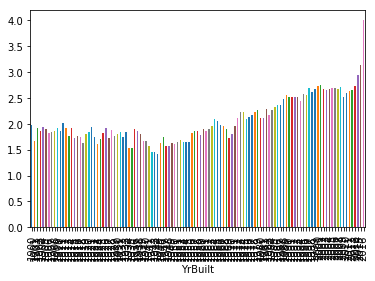

In [10]:
dataset['Bathrooms'].groupby([dataset['YrBuilt']]).mean().plot(kind='bar')

PARTE 2 - analisi e predizione

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score

In [11]:
# PUNTO 1
dataset_n = dataset.copy()

dataset_n['PropertyType'] = dataset_n['PropertyType'].replace(['Multiplex', 'Single Family', 'Townhouse'],[1,2,3])

In [12]:
dataset_n.dtypes

Id                   int64
SalePrice            int64
PropertyID           int64
AdjSalePrice       float64
NbrLivingUnits       int64
SqFtLot              int64
SqFtTotLiving        int64
SqFtFinBasement      int64
Bathrooms          float64
Bedrooms             int64
BldgGrade            int64
YrBuilt              int64
TrafficNoise         int64
LandVal              int64
ImpsVal              int64
PropertyType         int64
dtype: object

In [13]:
# PUNTO 2
X = dataset_n.drop('PropertyType', axis=1)
y = dataset_n['PropertyType']

In [14]:
fraction = 1/4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=fraction)

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

predicted = model.predict(X_test)

print('accuracy :')
print(accuracy_score(y_test, predicted))
print('confusion matrix :')
print(confusion_matrix(y_test, predicted))
print('classification report :')
print(classification_report(y_test, predicted))

accuracy :
0.9773869346733668
confusion matrix :
[[  47   23    2]
 [  13 5834   61]
 [   0   54  732]]
classification report :
              precision    recall  f1-score   support

           1       0.78      0.65      0.71        72
           2       0.99      0.99      0.99      5908
           3       0.92      0.93      0.93       786

   micro avg       0.98      0.98      0.98      6766
   macro avg       0.90      0.86      0.88      6766
weighted avg       0.98      0.98      0.98      6766



In [16]:
# la predizione dei risultati segue molto bene la distribuzione del dataset
# infatti l'accuracy è molto alta.
# la recall dell'attributo 1 è un po' bassa perchè abbiamo poche istanze della classe
# infatti il 30% della classe 1 viene classificato come classe 2.
# in un dataset bilanciato, o con un gran numero di classi 1 questo training 
# porterebbe ad una accuracy molto bassa

In [17]:
# PUNTO 3

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000) 
model.fit(X_train, y_train)

predicted = model.predict(X_test)

print('accuracy :')
print(accuracy_score(y_test, predicted))
print('confusion matrix :')
print(confusion_matrix(y_test, predicted))
print('classification report :')
print(classification_report(y_test, predicted))

accuracy :
0.8731894767957434
confusion matrix :
[[   0   72    0]
 [   0 5908    0]
 [   0  786    0]]
classification report :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        72
           2       0.87      1.00      0.93      5908
           3       0.00      0.00      0.00       786

   micro avg       0.87      0.87      0.87      6766
   macro avg       0.29      0.33      0.31      6766
weighted avg       0.76      0.87      0.81      6766



C:\Users\david\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
# allenando sullo stesso training set con una Logistic Regression
# otteniamo dei risultati deludenti, sebbene l'accuracy sia abbastanza alta 
# (comunque più bassa del decision tree clasifier).
# la confusion matri ci mostra che vengono predetti solamente risultati della 
# classe 1. L'accuracy alta è dovuta al fatto che la classe 1 è quella più numerosa
# 
# il decision tree in questo caso ci ha dato risultati preferibili e più corretti

In [19]:
# PUNTO 4
# 5 fold cross validation
model = DecisionTreeClassifier()
num_folds = 5
scoring = 'accuracy'

results = cross_val_score(model, X, y, scoring=scoring, cv=num_folds)

print('decision tree with ', scoring,' and numero di fold ',num_folds,' :', results.mean())

decision tree with  accuracy  and numero di fold  5  : 0.7867504788014946


In [20]:
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
num_folds = 5
scoring = 'accuracy'

results = cross_val_score(model, X, y, scoring=scoring, cv=num_folds)

print('logistic regre with ', scoring,' and numero di fold ',num_folds,' :', results.mean())

logistic regre with  accuracy  and numero di fold  5  : 0.8679008397947682


In [21]:
# ora con 10 fold cross validation

model = DecisionTreeClassifier()
num_folds = 10
scoring = 'accuracy'

results = cross_val_score(model, X, y, scoring=scoring, cv=num_folds)

print('decision tree with ', scoring,' and numero di fold ',num_folds,' :', results.mean())

decision tree with  accuracy  and numero di fold  10  : 0.8324340091781186


In [22]:
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
num_folds = 10
scoring = 'accuracy'

results = cross_val_score(model, X, y, scoring=scoring, cv=num_folds)

print('logistic regre with ', scoring,' and numero di fold ',num_folds,' :', results.mean())

logistic regre with  accuracy  and numero di fold  10  : 0.8679008945642765


In [23]:
# è sicuramente più affidabile il 10 fold cross-validation test
# perchè viene eseguito più volte allenando su 10 training set diversi e 
# di conseguenza simula meglio contesti diversi.
# infatti un tipo di cross validation, il Leave One Out cv, è quello più affidabile.
# che divide il set in N training set, dove N è la dimensione del set.
# naturalmente più il numero di fold è alto e più il carico 
# computazionale sarà grande

In [24]:
def number(y, y_pred, **kwargs):
    equals = y[(y == y_pred)]
    equals_1 = equals[y == 1]
    n = len(equals_1)
    return n


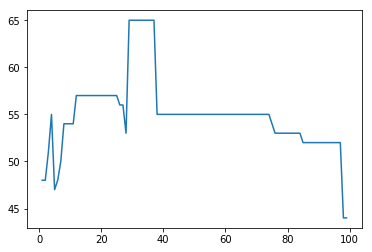

In [31]:
# PARTE 5


min_p = 1
max_p = 100
step = 1
results = []

for i in np.arange(min_p, max_p, step) :
    model = DecisionTreeClassifier(min_samples_leaf=i)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    results.append(number(y_test, predicted))
    
plt.plot(np.arange(min_p, max_p, step), results)  
plt.show()

In [32]:
# PUNTO 6

interval = pd.cut(dataset_n['SalePrice'], bins=12, labels=False) 
dataset_n['SalePrice'] = interval

In [33]:
X = dataset_n.drop('PropertyType', axis=1)
y = dataset_n['PropertyType']

In [34]:
fraction = 1/4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=fraction)

In [35]:
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

predicted = model.predict(X_test)

print('accuracy :')
print(accuracy_score(y_test, predicted))
print('confusion matrix :')
print(confusion_matrix(y_test, predicted))
print('classification report :')
print(classification_report(y_test, predicted))

accuracy :
0.9818208690511381
confusion matrix :
[[  54    8    0]
 [  16 5814   51]
 [   0   48  775]]
classification report :
              precision    recall  f1-score   support

           1       0.77      0.87      0.82        62
           2       0.99      0.99      0.99      5881
           3       0.94      0.94      0.94       823

   micro avg       0.98      0.98      0.98      6766
   macro avg       0.90      0.93      0.92      6766
weighted avg       0.98      0.98      0.98      6766



In [36]:
# L'accuracy rimane pressochè invariata assegnando solo intervalli
# alla classe SalePrice. Abbiamo una recall e precision (e di conseguenza anche una accuracy)
# migliore sulla classe 1

In [40]:
# PUNTO 7
from sklearn.utils import resample

smaller = dataset_n[dataset_n['PropertyType']==1]
bigger1 = dataset_n[dataset_n['PropertyType']==2]
bigger2 = dataset_n[dataset_n['PropertyType']==3]

# bilanciamo le classi 
smaller_size = len(smaller)
smaller = resample(smaller, replace=True, n_samples=smaller_size*2) # can be also n_samples=len(bigger)

dataset_bal = pd.concat([bigger1, bigger2, smaller])
dataset_bal.groupby('PropertyType').size()


PropertyType
1      518
2    23488
3     3316
dtype: int64

In [41]:
# raddoppio con resampling il numero di classi Multiplex

In [42]:
X = dataset_bal.drop('PropertyType', axis=1)
y = dataset_bal['PropertyType']

In [43]:
fraction = 1/4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=fraction)

In [44]:
model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

predicted = model.predict(X_test)

print('accuracy :')
print(accuracy_score(y_test, predicted))
print('confusion matrix :')
print(confusion_matrix(y_test, predicted))
print('classification report :')
print(classification_report(y_test, predicted))

accuracy :
0.9824330259112868
confusion matrix :
[[ 120    6    0]
 [  16 5836   46]
 [   0   52  755]]
classification report :
              precision    recall  f1-score   support

           1       0.88      0.95      0.92       126
           2       0.99      0.99      0.99      5898
           3       0.94      0.94      0.94       807

   micro avg       0.98      0.98      0.98      6831
   macro avg       0.94      0.96      0.95      6831
weighted avg       0.98      0.98      0.98      6831



In [ ]:
# L'accuracy nuovamente rimane praticamente la stessa, 
# ma questa volta la precision e la recall sulla classe 1 sono 
# migliorate notevolmente, arrivando ad un f1 score che supera 0.9.
# questo promette risultati molto più affidabili in un dataset bilanciato